### Exploratory Data Analysis on IMDB Dataset

In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))



[]


In [4]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Built with CUDA:", tf.test.is_built_with_cuda())
print("GPU Available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.15.0
Built with CUDA: False
GPU Available: []


In [22]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datasets import load_dataset
from collections import Counter
import re
from wordcloud import WordCloud

In [4]:
# load data
dataset= load_dataset("imdb")
train= dataset['train']
test= dataset['test']

d:\Github\IMDB_Sentimental_Analysis\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\caaka\.cache\huggingface\hub\datasets--imdb. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating unsupervised split: 100%|██████████| 50000/50000 [00:00<00:00, 398003.48 examples/s]


In [ ]:
# printing data info
print(train)
print(test)


Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})
Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})


In [6]:
# printing sample data
print(train[0])

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [7]:
# Converting train data to pandas dataframe
train_df= pd.DataFrame(train)
train_df.head()

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


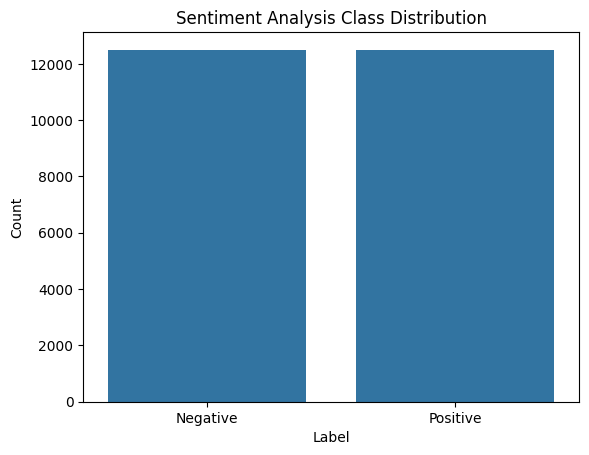

In [10]:
# Plotting class distribution
sns.countplot(x='label', data=train_df)
plt.title('Sentiment Analysis Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()


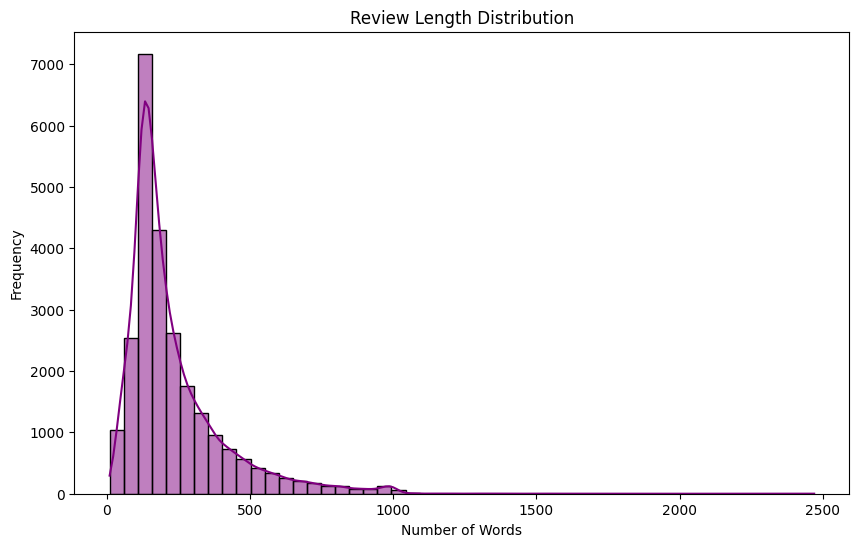

In [15]:
# Adding a column with review length
train_df['review_length'] = train_df['text'].apply(lambda x: len(x.split()))
# Plotting review length distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_df['review_length'], bins=50, kde=True, color='purple', edgecolor='black')
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

From the above graph, we can conclude that most of the reviews have less than 500 words.

In [16]:
# Displaying Sample Positive and Negative Review
print("Sample Positive Review:")
print(train_df[train_df['label'] == 1]['text'].iloc[0])
print("\nSample Negative Review:")
print(train_df[train_df['label'] == 0]['text'].iloc[0])

Sample Positive Review:
Zentropa has much in common with The Third Man, another noir-like film set among the rubble of postwar Europe. Like TTM, there is much inventive camera work. There is an innocent American who gets emotionally involved with a woman he doesn't really understand, and whose naivety is all the more striking in contrast with the natives.<br /><br />But I'd have to say that The Third Man has a more well-crafted storyline. Zentropa is a bit disjointed in this respect. Perhaps this is intentional: it is presented as a dream/nightmare, and making it too coherent would spoil the effect. <br /><br />This movie is unrelentingly grim--"noir" in more than one sense; one never sees the sun shine. Grim, but intriguing, and frightening.

Sample Negative Review:
I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this

C:\Users\caaka\AppData\Local\Temp\ipykernel_2480\3956877654.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=most_common_df, palette='viridis')


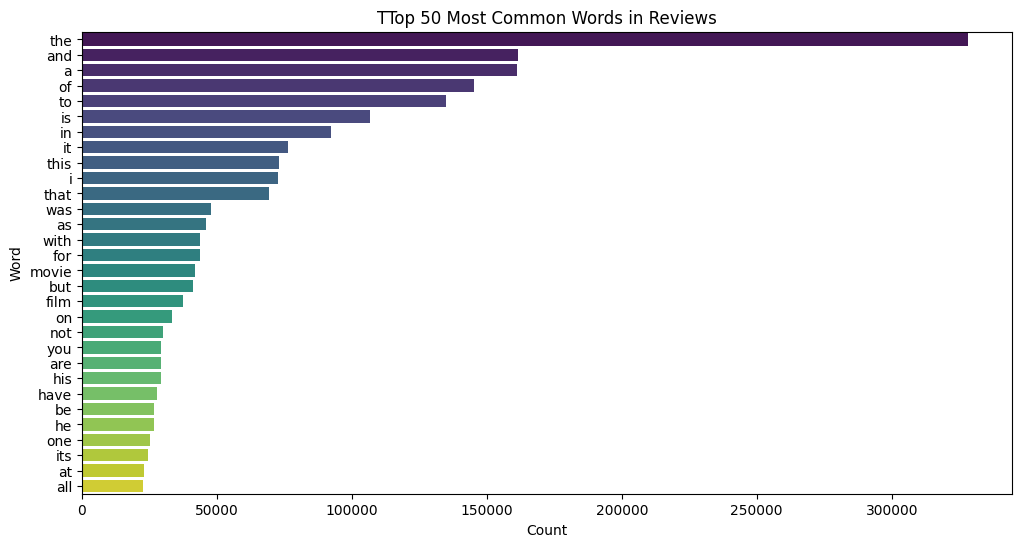

In [ ]:
# Most Common Words

def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

all_words= " ".join(train_df['text'].apply(clean_text)).split()
word_counts= Counter(all_words)
most_common_words= word_counts.most_common(30)

# Plotting Most Common Words
most_common_df= pd.DataFrame(most_common_words, columns=['Word', 'Count'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Word', data=most_common_df, palette='viridis')
plt.title('Top 30 Most Common Words in Reviews')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()


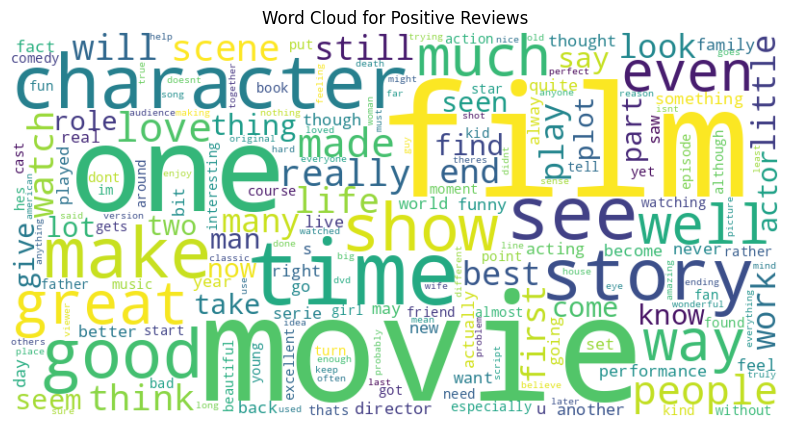

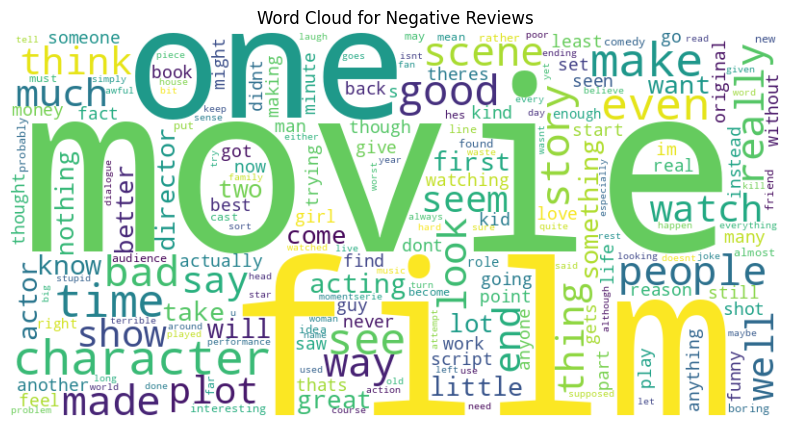

In [26]:
# Word Cloud by Sentiment

pos_text= " ".join(train_df[train_df['label'] == 1]['text'].apply(clean_text))
neg_text= " ".join(train_df[train_df['label'] == 0]['text'].apply(clean_text))

# Generating Word Cloud for Positive Reviews
wordcloud_pos= WordCloud(width=800, height=400, background_color='white').generate(pos_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Generating Word Cloud for Negative Reviews
wordcloud_neg= WordCloud(width=800, height=400, background_color='white').generate(neg_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()